###Dataset Description:
We will try to build a machine learning model to accurately predict whether
or not the patients in the dataset have diabetes or not?
The datasets consists of several medical predictor variables and one target variable, Outcome.
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level,
age, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

<Axes: ylabel='count'>

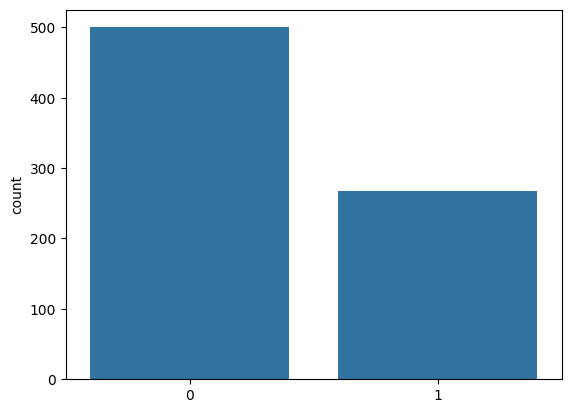

In [5]:
sns.countplot(x=y)

In [6]:
print(pd.Series(y).value_counts())


0    500
1    268
Name: count, dtype: int64


In [7]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
x.shape

(768, 7)

In [8]:
print("x_train.shape : ", x_train.shape, "\nx_test.shape : ", x_test.shape)

x_train.shape :  (537, 7) 
x_test.shape :  (231, 7)


In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

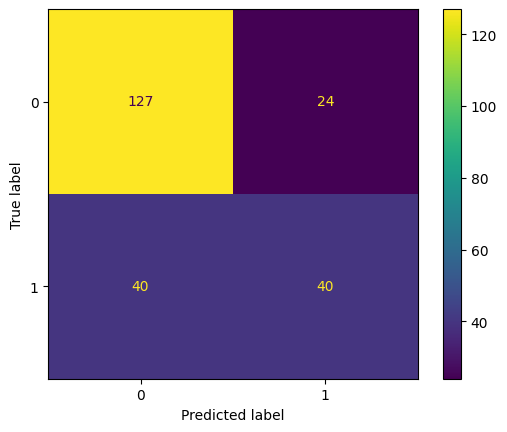

In [10]:
y_pred = knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       151
           1       0.62      0.50      0.56        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231



In [18]:
# Step 1: Specify the values for CreditScore and Age
input_credit_score = 248  # Replace with the desired Credit Score
input_age = 35            # Replace with the desired Age

# Step 2: Prepare the input data
# Create a DataFrame with the input values including all required features
input_data = pd.DataFrame({
    'Glucose': [input_credit_score],
    'Age' : [input_age],
    'Pregnancies': [7],
    'BloodPressure': [72],          # Example value, can be adjusted
    'SkinThickness': [35],      # Example value, can be adjusted
    'Insulin': [0],   # Example value, can be adjusted
    'BMI': [1],       # Example value, can be adjusted
    # 'IsActiveMember': [1],   # Example value, can be adjusted
    # 'EstimatedSalary': [50000]  # Example value, can be adjusted
})

# Step 3: Scale the input data using the previously fitted scaler
scaled_input = scaler.transform(input_data)

# Step 4: Make predictions using the trained model
prediction = knn.predict(scaled_input)

# Step 5: Output the prediction
if prediction[0] == 1:
    print("Yes")
else:
    print("No")


Yes


C:\Users\purva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
